In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
df=pd.read_csv('D:/Python programming/Machine learning/POC/Neural_Networks_poc/Datasets/real_estate.csv')

In [3]:
df

,Unnamed: 0,Date Recorded,List Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Longitude,Latitude
0,0,2021-04-14,2020,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,-73.068220,41.350140
1,1,2021-05-26,2020,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,-73.084938,41.346439
2,2,2021-09-13,2020,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,Commercial,-73.084938,41.346439
3,3,2020-12-14,2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,-73.084938,41.346439
4,4,2021-09-07,2020,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family,-72.830800,41.809500
...,...,...,...,...,...,...,...,...,...,...,...,...
1045447,1054154,2021-11-16,2021,Watertown,50 SUMMIT RIDGE,263100.0,430000.0,0.6118,Residential,Single Family,-73.114797,41.586333
1045448,1054155,2022-09-20,2021,Woodbury,89 TAMARACK LANR UNIT 89A,79810.0,200000.0,0.3990,Residential,Condo,-73.232742,41.517140
1045449,1054156,2022-05-06,2021,Woodbury,69 BACON POND ROAD,79590.0,360000.0,0.2210,Vacant Land,Vacant Land,-73.191290,41.543605
1045450,1054157,2022-06-29,2021,West Haven,114 TUTHILL ST,117600.0,275000.0,0.4276,Residential,Single Family,-72.976177,41.281588


In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045452 entries, 0 to 1045451
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1045452 non-null  int64  
 1   Date Recorded     1045452 non-null  object 
 2   List Year         1045452 non-null  int64  
 3   Town              1045452 non-null  object 
 4   Address           1045452 non-null  object 
 5   Assessed Value    1045452 non-null  float64
 6   Sale Amount       1045452 non-null  float64
 7   Sales Ratio       1045452 non-null  float64
 8   Property Type     1045452 non-null  object 
 9   Residential Type  1045452 non-null  object 
 10  Longitude         1045452 non-null  float64
 11  Latitude          1045452 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 95.7+ MB


In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045452 entries, 0 to 1045451
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1045452 non-null  int64  
 1   Date Recorded     1045452 non-null  object 
 2   List Year         1045452 non-null  int64  
 3   Town              1045452 non-null  object 
 4   Address           1045452 non-null  object 
 5   Assessed Value    1045452 non-null  float64
 6   Sale Amount       1045452 non-null  float64
 7   Sales Ratio       1045452 non-null  float64
 8   Property Type     1045452 non-null  object 
 9   Residential Type  1045452 non-null  object 
 10  Longitude         1045452 non-null  float64
 11  Latitude          1045452 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 95.7+ MB


In [8]:
df['Town'].unique().size

169

In [9]:
df['Residential Type'].unique()

array(['Single Family', 'Three Family', 'Commercial', 'Two Family',
       'Condo', 'Vacant Land', 'Public Utility', 'Apartments',
       'Four Family', 'Industrial'], dtype=object)

In [10]:
df['Residential Type'].unique().size

10

In [11]:
df['Town'].value_counts()

Town
Bridgeport    36228
Stamford      34632
Waterbury     30710
Norwalk       25489
New Haven     22611
              ...  
Colebrook       559
Hartland        484
Canaan          471
Scotland        457
Union           284
Name: count, Length: 169, dtype: int64

In [12]:
df=df[df['Town']=='Bridgeport']

In [13]:
df

,Unnamed: 0,Date Recorded,List Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Longitude,Latitude
371,371,2020-10-01,2020,Bridgeport,116 BASSICK AVE,76090.0,148700.0,0.511700,Residential,Single Family,-73.210960,41.171540
792,792,2020-10-01,2020,Bridgeport,123 FOLINO DR,164920.0,290000.0,0.568600,Residential,Single Family,-73.235400,41.221860
1036,1036,2001-10-29,2001,Bridgeport,176 MORNINGSIDE DR,71050.0,150000.0,0.473667,Residential,Single Family,-73.195200,41.186500
4329,4329,2002-04-22,2001,Bridgeport,24 HARVARD ST,72801.0,169900.0,0.428493,Residential,Single Family,-73.195200,41.186500
4886,4887,2020-10-01,2020,Bridgeport,96 READ ST,99250.0,125000.0,0.794000,Residential,Two Family,-73.156930,41.178970
...,...,...,...,...,...,...,...,...,...,...,...,...
1013283,1021850,2022-09-07,2021,Bridgeport,96 ROSE ST,132640.0,262500.0,0.505200,Residential,Single Family,-73.182090,41.202608
1013297,1021864,2022-07-21,2021,Bridgeport,136 BEECHWOOD AVE,248940.0,350000.0,0.711200,Residential,Two Family,-73.208012,41.181142
1013304,1021871,2022-05-26,2021,Bridgeport,1147 NOBLE AVE #1149,196115.0,475000.0,0.412800,Residential,Two Family,-73.183916,41.197419
1013313,1021880,2022-04-04,2021,Bridgeport,360 JANE ST,21460.0,79000.0,0.271646,Vacant Land,Vacant Land,-73.179256,41.190099


In [14]:
X=df.drop(columns=['Unnamed: 0','Date Recorded','Property Type','Address'])

In [15]:
Y=df['Property Type']

In [16]:
X

,List Year,Town,Assessed Value,Sale Amount,Sales Ratio,Residential Type,Longitude,Latitude
371,2020,Bridgeport,76090.0,148700.0,0.511700,Single Family,-73.210960,41.171540
792,2020,Bridgeport,164920.0,290000.0,0.568600,Single Family,-73.235400,41.221860
1036,2001,Bridgeport,71050.0,150000.0,0.473667,Single Family,-73.195200,41.186500
4329,2001,Bridgeport,72801.0,169900.0,0.428493,Single Family,-73.195200,41.186500
4886,2020,Bridgeport,99250.0,125000.0,0.794000,Two Family,-73.156930,41.178970
...,...,...,...,...,...,...,...,...
1013283,2021,Bridgeport,132640.0,262500.0,0.505200,Single Family,-73.182090,41.202608
1013297,2021,Bridgeport,248940.0,350000.0,0.711200,Two Family,-73.208012,41.181142
1013304,2021,Bridgeport,196115.0,475000.0,0.412800,Two Family,-73.183916,41.197419
1013313,2021,Bridgeport,21460.0,79000.0,0.271646,Vacant Land,-73.179256,41.190099


In [17]:
X['Residential Type'].unique().size

9

In [18]:
X['Residential Type'].value_counts()

Residential Type
Single Family    25237
Condo             4454
Two Family        3580
Three Family      2294
Four Family        349
Commercial         205
Vacant Land         52
Apartments          31
Industrial          26
Name: count, dtype: int64

In [19]:
X.drop(columns=['Town'],inplace=True)

In [20]:
X

,List Year,Assessed Value,Sale Amount,Sales Ratio,Residential Type,Longitude,Latitude
371,2020,76090.0,148700.0,0.511700,Single Family,-73.210960,41.171540
792,2020,164920.0,290000.0,0.568600,Single Family,-73.235400,41.221860
1036,2001,71050.0,150000.0,0.473667,Single Family,-73.195200,41.186500
4329,2001,72801.0,169900.0,0.428493,Single Family,-73.195200,41.186500
4886,2020,99250.0,125000.0,0.794000,Two Family,-73.156930,41.178970
...,...,...,...,...,...,...,...
1013283,2021,132640.0,262500.0,0.505200,Single Family,-73.182090,41.202608
1013297,2021,248940.0,350000.0,0.711200,Two Family,-73.208012,41.181142
1013304,2021,196115.0,475000.0,0.412800,Two Family,-73.183916,41.197419
1013313,2021,21460.0,79000.0,0.271646,Vacant Land,-73.179256,41.190099


In [21]:
Y.unique().size

4

In [22]:
Y.unique()

array(['Residential', 'Commercial', 'Industrial', 'Vacant Land'],
      dtype=object)

In [23]:
X_dummies=pd.get_dummies(X,columns=['Residential Type'],dtype=int)

In [24]:
Y_dummies=pd.get_dummies(Y,dtype=int)

In [25]:
Y_dummies

,Commercial,Industrial,Residential,Vacant Land
371,0,0,1,0
792,0,0,1,0
1036,0,0,1,0
4329,0,0,1,0
4886,0,0,1,0
...,...,...,...,...
1013283,0,0,1,0
1013297,0,0,1,0
1013304,0,0,1,0
1013313,0,0,0,1


In [26]:
X_dummies

,List Year,Assessed Value,Sale Amount,Sales Ratio,Longitude,Latitude,Residential Type_Apartments,Residential Type_Commercial,Residential Type_Condo,Residential Type_Four Family,Residential Type_Industrial,Residential Type_Single Family,Residential Type_Three Family,Residential Type_Two Family,Residential Type_Vacant Land
371,2020,76090.0,148700.0,0.511700,-73.210960,41.171540,0,0,0,0,0,1,0,0,0
792,2020,164920.0,290000.0,0.568600,-73.235400,41.221860,0,0,0,0,0,1,0,0,0
1036,2001,71050.0,150000.0,0.473667,-73.195200,41.186500,0,0,0,0,0,1,0,0,0
4329,2001,72801.0,169900.0,0.428493,-73.195200,41.186500,0,0,0,0,0,1,0,0,0
4886,2020,99250.0,125000.0,0.794000,-73.156930,41.178970,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013283,2021,132640.0,262500.0,0.505200,-73.182090,41.202608,0,0,0,0,0,1,0,0,0
1013297,2021,248940.0,350000.0,0.711200,-73.208012,41.181142,0,0,0,0,0,0,0,1,0
1013304,2021,196115.0,475000.0,0.412800,-73.183916,41.197419,0,0,0,0,0,0,0,1,0
1013313,2021,21460.0,79000.0,0.271646,-73.179256,41.190099,0,0,0,0,0,0,0,0,1


In [27]:
Y.size

36228

In [28]:
X_dummies.columns.size

15

In [29]:
from sklearn.preprocessing import StandardScaler
scalar =StandardScaler()

In [30]:
from sklearn.model_selection import train_test_split
Xtr,Xte,Ytr,Yte =train_test_split(X_dummies,Y_dummies,test_size=0.2,random_state=1)

In [31]:
Xtr_scaled=scalar.fit_transform(Xtr)
Xte_scaled=scalar.transform(Xte)

In [32]:
Xtr_scaled.shape

(28982, 15)

In [33]:
Ytr.shape

(28982, 4)

In [34]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [35]:
model =Sequential()

In [36]:
model.add(Dense(15,activation="relu",input_dim=15))
# model.add(Dense(11,activation='relu'))
model.add(Dense(4,activation="softmax"))

c:\Users\RameshPatil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            64 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 304 (1.19 KB)

 Trainable params: 304 (1.19 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [39]:
history=model.fit(Xtr_scaled,Y_dummies,epochs=100,validation_split=0.2)

Epoch 1/100
725/725 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8911 - loss: 0.4238 - val_accuracy: 1.0000 - val_loss: 0.0074
Epoch 2/100
725/725 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9999 - loss: 0.0060 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 3/100
725/725 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9997 - loss: 0.0039 - val_accuracy: 1.0000 - val_loss: 7.1268e-04
Epoch 4/100
725/725 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9999 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 3.8645e-04
Epoch 5/100
725/725 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9999 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 2.5276e-04
Epoch 6/100
725/725 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9999 - loss: 6.0846e-04 - val_accuracy: 1.0000 - val_loss: 2.0701e-04
Epoch 7/100
725/725 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9999 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 1.5016e-04
Epoch 8/100
725/725 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9998 -

In [40]:
y_prob=model.predict(Xte)

227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [41]:
y_prob

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(Yte,y_prob)

0.9918575765939829

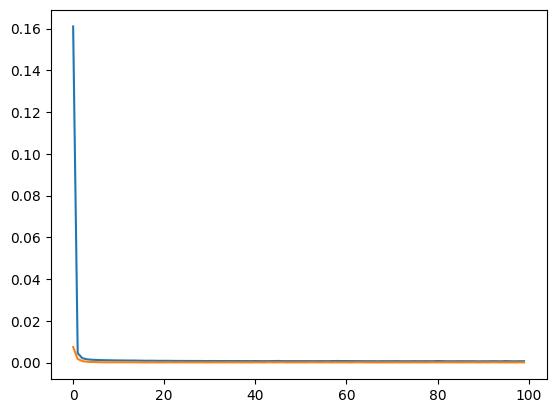

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

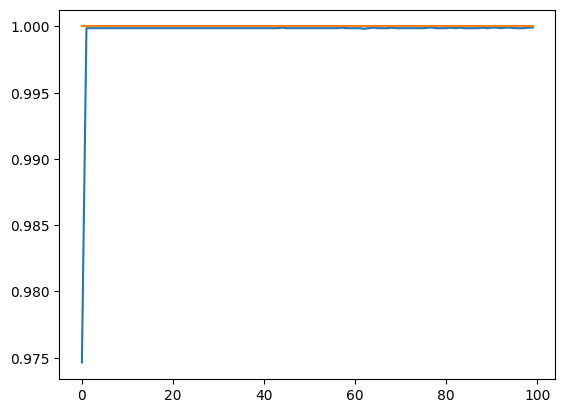

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])